# HEATMAP

potresti provare per favore a fare:
- la somma totale dei conteggi per A e B
- la somma totale dei conteggi escludendo i pixel con count>36 (tenendo traccia di quanti pixel sono così mascherati)
- la somma totale di conteggi escludendo i pixel con count >360

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm, Normalize

import seaborn as sns; sns.set_theme()


%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]
button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/INTIME2/NOISE_A_INTIMETH_1200_PREAMP_30_CD_100_LDAC_14.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/INTIME2/NOISE_B_INTIMETH_1200_PREAMP_30_CD_100_LDAC_14.txt


In [2]:
paths = button.files

In [3]:
def getHits(file):
    channels = []
    counts = []
    with open (file, 'rt') as myfile:
        lines = myfile.readlines()
        for i in range(0, len(lines)):    
            line = lines[i].split()
            if(line[0].isdigit()):
                channels.append(int(line[0]))
                counts.append(int(line[1]))
    #a = pd.DataFrame(list(zip(channels, counts)), columns = ['Channel', "Counts"]) 
    return counts

In [4]:
def calcolaCose(vettore, start,end, maxx):
    Sum = 0
    count = 0
    minor = []
    for x in vettore[start:end]:
        if(x<maxx):
            minor.append(x)
            Sum += x
        else:
            count+=1
    return count, Sum, minor


In [5]:
def printStats(fileA, fileB):
    counts_A = getHits(fileA)
    counts_B = getHits(fileB)

    countA36, sumA36, minorA36 = calcolaCose(counts_A,16,128, 36)
    countA360, sumA360, minorA360 = calcolaCose(counts_A, 16,128, 360)
    countB36, sumB36, minorB36 = calcolaCose(counts_B,128,240, 36)
    countB360, sumB360, minorB360 = calcolaCose(counts_B,128,240, 360)

    
    model = os.path.basename(fileA[-7:-4])
    
    #print("SOGLIA: "+model +"\n")
    print("IN-TIME THRESHOLD: 1200 \n")
    print("Soglia A: 900 \n")
    print("A:")
    print("Tot hits --> "+str(sum(counts_A[16:128])))
    print("Mean --> "+str(round(np.mean(counts_A[16:128]), 2)))    
    print("Hits < 36 --> " +str(sumA36) + ", mean: " + str(round(np.mean(minorA36), 2)) + ", excluding "+ str(countA36)+ " pixels")
    print("Hits < 360 --> " +str(sumA360) + ", mean: " + str(round(np.mean(minorA360), 2)) + ", excluding "+ str(countA360)+ " pixels")

   
    print("\nSoglia B: 1100")
    print("B:")
    print("Tot hits --> "+ str(sum(counts_B[128:240])))
    print("Mean -->"+str(round(np.mean(counts_B[128:240]),2)))
    print("Hits < 36 --> " +str(sumB36) + ", mean: " + str(round(np.mean(minorB36), 2)) + ", excluding "+ str(countB36)+ " pixels")
    print("Hits < 360 --> " +str(sumB360) + ", mean: " + str(round(np.mean(minorB360), 2)) + ", excluding "+ str(countB360)+ " pixels")

    print("\n-------------------------------------------\n")    


In [6]:
def plotHeatmap(fileA, fileB):
    
    counts_A = getHits(fileA)
    counts_B = getHits(fileB)   
    
    noise_A = [counts_A[x:x+7] for x in range(16, 128, 7)]
    noise_B = [counts_B[x:x+7] for x in range(128, 240, 7)]
    
    
    model = os.path.basename(fileA[-8:-4])

    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey='row', figsize = (9, 9))
    fig.subplots_adjust(wspace=0.01)
    
    sns.heatmap(noise_A, ax = ax1, annot = True, fmt="d" , vmin=0,vmax = 36, xticklabels=False, yticklabels=False, square=True, cbar = False, cmap = "jet") #cmap="BuPu"
    fig.colorbar(ax1.collections[0],  ax=ax1, location = "left", use_gridspec=False, pad=0)

    sns.heatmap(noise_B, ax = ax2,annot = True, fmt="d", vmin=0, vmax = 36, xticklabels=False, yticklabels=False, square=True, cbar = False, cmap = "jet") #cmap="BuPu"
    fig.colorbar(ax2.collections[0], ax=ax2, location = "right", use_gridspec=False, pad=0)

    ax1.set_xlabel("RD53A")
    ax2.set_xlabel("RD53B")

    #fig.suptitle('Noise Occupancy with threshold = '+ model + " electrons",fontsize=20, y = 0.92)
    fig.suptitle('Noise Occupancy with in-time threshold = 1200 electrons (I_PREAMP=30uA, CD=100fF)',fontsize=20, y = 0.92)
    
    #plt.savefig('Noise Occupancy with in-time threshold = 1200 electrons IPREAMP=30uA CD=100fF', bbox_inches='tight')

    plt.show()


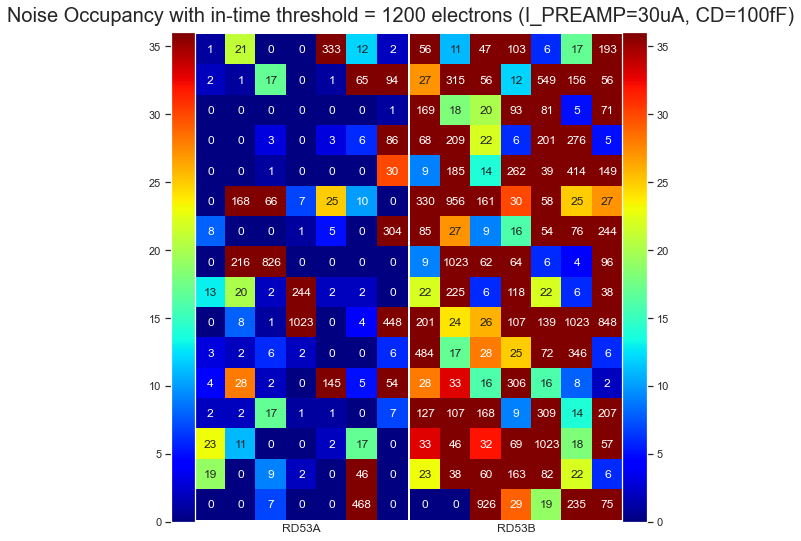

IN-TIME THRESHOLD: 1200 

Soglia A: 900 

A:
Tot hits --> 4973
Mean --> 44.4
Hits < 36 --> 387, mean: 4.03, excluding 16 pixels
Hits < 360 --> 2208, mean: 20.44, excluding 4 pixels

Soglia B: 1100
B:
Tot hits --> 15371
Mean -->137.24
Hits < 36 --> 815, mean: 16.3, excluding 62 pixels
Hits < 360 --> 8125, mean: 78.88, excluding 9 pixels

-------------------------------------------



In [7]:

"""
for i in range(0,1):
    plotHeatmap(paths[i], paths[i+1])
    printStats(paths[i], paths[i+1])
"""

plotHeatmap(paths[0], paths[1])
printStats(paths[0], paths[1])

